## AIM: To transfer data from Amy's data to python

In [79]:
# to use cd, etc
import sys
import os

import numpy as np
# for math work
from numpy import linalg, matlib
# save, import and load data
from numpy import asarray, save, load

# needed for some matrix manipulations
# import cvxpy as cp
# import math 

import scipy
# for curve fitting
from scipy import optimize
from scipy.io import loadmat  # this is the SciPy module that loads mat-files

import mat73

import pandas as pd

import matplotlib.pyplot as plt
# for plots
import seaborn
# set up seaborn for the plots
seaborn.set()

# suppress deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# # to save data plots
from matplotlib.backends.backend_pdf import PdfPages

In [80]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [81]:
sessStart = '072312'
sessEnd = '080412'

In [82]:
# decDir = 'decoderParams_jeev072312_080412.mat'
# nDir is trial-aligned to the go cue and uses all the trial data
# nDir = 'catNeuralDat_jeev072312_080412_trE5_B100.mat'
sessDir = 'catNeuralDat_jeev' + sessStart + '_' + sessEnd + '_trE5_B100.mat'
pathDir = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev' + sessStart + '_' + sessEnd
os.chdir(pathDir)
os.getcwd()

'/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev072312_080412'

In [83]:
sess_path = pathDir + '/' + sessDir

In [84]:
sess_dict = mat73.loadmat(sess_path, use_attrdict=True)
sess_dict.keys()

dict_keys(['N_bmi', 'N_mc', 'N_norm_bmi', 'N_vfb', 'binvector', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'mFRs', 'mcDay', 'mcSessions', 'params', 'sdFRs', 'sessID_bmi', 'sessID_mc', 'sessID_vfb', 'sessions', 'trEs_bmi', 'trEs_mc', 'trEs_vfb', 'trTs_bmi', 'trTs_mc', 'trTs_vfb', 'vfbDay', 'vfbSessions'])

In [103]:
sess_dict['trEs_bmi'][1]

array([ 2., 70., 15.,  5.,  6.,  7.,  9., 11.])

In [86]:
paramsDir = 'catBehaviorDat_jeev' + sessStart + '_' + sessEnd + '.mat'
params_path = pathDir + '/' + paramsDir

In [87]:
params_dict =  mat73.loadmat(params_path, use_attrdict=True)
params_dict.keys()

dict_keys(['EPM', 'MD_sd', 'MD_w', 'ME_sd', 'ME_w', 'MS_sd', 'MS_w', 'MV_sd', 'MV_w', 'P', 'Plower', 'Psd', 'Pupper', 'RT_sd', 'RT_w', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'epmTime', 'kinSegs', 'maxD_sd', 'maxD_w', 'mcDay', 'mcSessions', 'params', 'params1', 'rotKinSegs', 'segE', 'segT', 'sessID', 'sessID_epm', 'sessID_kin', 'sessType', 'sessions', 'stats', 'trTime', 'tr_e', 'tr_t'])

### Session Information

In [147]:
params_dict.keys()

dict_keys(['EPM', 'MD_sd', 'MD_w', 'ME_sd', 'ME_w', 'MS_sd', 'MS_w', 'MV_sd', 'MV_w', 'P', 'Plower', 'Psd', 'Pupper', 'RT_sd', 'RT_w', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'epmTime', 'kinSegs', 'maxD_sd', 'maxD_w', 'mcDay', 'mcSessions', 'params', 'params1', 'rotKinSegs', 'segE', 'segT', 'sessID', 'sessID_epm', 'sessID_kin', 'sessType', 'sessions', 'stats', 'trTime', 'tr_e', 'tr_t'])

In [90]:
params_dict['stats'].keys()

dict_keys(['bps', 'maxDev', 'maxSpeed', 'meanDev', 'mvmtErr', 'reachT', 'targDir', 'varDev'])

In [148]:
params_dict['tr_e']

array([[ 2., 70., 15., ..., 12.,  2., 70.],
       [ 2., 70., 15., ...,  7.,  9., 11.],
       [ 2., 64., 15., ..., 12.,  2., 64.],
       ...,
       [ 2., 71., 15., ...,  7.,  9., 11.],
       [ 2., 66., 15., ...,  7.,  9., 11.],
       [ 2., 64., 15., ...,  7.,  8.,  2.]])

In [149]:
succIdx = np.where((params_dict['tr_e'][:, succCol] == 8) | (params_dict['tr_e'][:, succCol] == 9))[0]
succIdx.shape
# reachTime = params_dict['stats']['reachT']

(9730,)

In [150]:
succIdx

array([   1,    5,   14, ..., 9824, 9825, 9826])

In [152]:
reachTime = params_dict['stats']['reachT'][succIdx-1]
reachTime.shape

(9730,)

In [168]:
params_dict['bmiDecoderInd']

array([1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 4., 5., 5., 5.,
       6., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 9.])

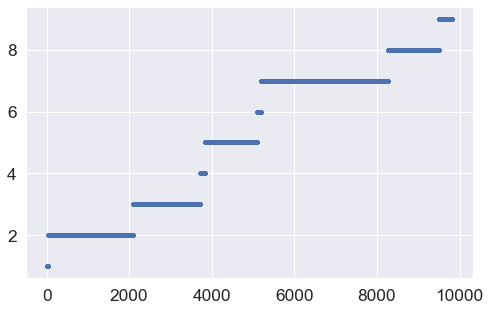

In [172]:
sessID_bmiOff = sess_dict['sessID_bmi'] - 1
bmiDecTrial = sess_dict['bmiDecoderInd'][sessID_bmiOff.astype(int)]
plt.plot(bmiDecTrial,'.')

1.0437545092497433


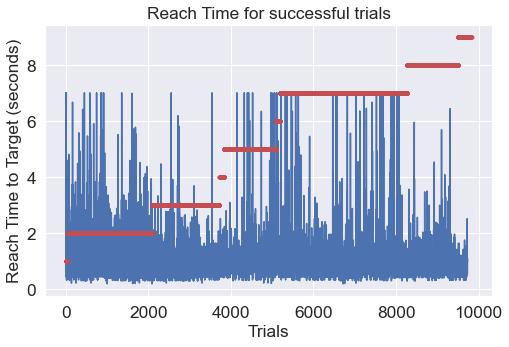

In [173]:
plt.plot(reachTime)
plt.plot(bmiDecTrial,'r.')
plt.xlabel("Trials")
plt.ylabel("Reach Time to Target (seconds)")
plt.title("Reach Time for successful trials")
print(np.mean(reachTime))


In [174]:
bmiDecTrial

array([1., 1., 1., ..., 9., 9., 9.])

0.7042342432729078


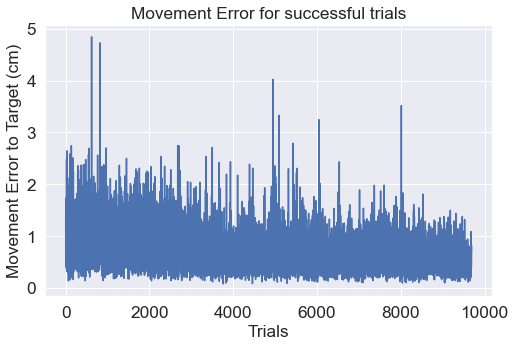

In [165]:
mvtErr = (params_dict['stats']['mvmtErr'][succIdx-1])[42:]
plt.plot(mvtErr)
plt.xlabel("Trials")
plt.ylabel("Movement Error to Target (cm)")
plt.title("Movement Error for successful trials")
print(np.mean(mvtErr))

### Target Position ($\tau$)

### Cursor Position ($y$)

### Decoder Data ($K$)

In [11]:
# number of BMI sessions
len(sess_dict['bmiSessions'])

30

In [12]:
sess_dict['bmiSessions']

['jeev072312c',
 'jeev072312d',
 'jeev072312e',
 'jeev072312f',
 'jeev072412c',
 'jeev072412d',
 'jeev072512c',
 'jeev072512d',
 'jeev072612c',
 'jeev072612d',
 'jeev072612e',
 'jeev072712c',
 'jeev072812c',
 'jeev072812d',
 'jeev072812e',
 'jeev072912c',
 'jeev073012c',
 'jeev073012e',
 'jeev073012f',
 'jeev073112c',
 'jeev073112e',
 'jeev080112c',
 'jeev080112d',
 'jeev080212c',
 'jeev080212e',
 'jeev080212f',
 'jeev080312c',
 'jeev080412d',
 'jeev080412f',
 'jeev080412g']

In [13]:
# which decoder was used for which sessions
sess_dict['bmiDecoderInd']

array([1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 4., 5., 5., 5.,
       6., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 9.])

In [14]:
len(sess_dict['bmiDecoderInd'])

30

In [15]:
sess_dict['bmiDecoders']

[['G:/data/\\jeev\\jeev072312\\jeev072312_VFB_Kawf_B100_NS5_NU16_Z1.mat'],
 ['G:/data/\\jeev\\jeev072312\\jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch.mat'],
 ['G:/data/\\jeev\\jeev072612\\jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch.mat'],
 ['G:/data/\\jeev\\jeev072812\\jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812.mat'],
 ['G:/data/\\jeev\\jeev072812\\jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812_smoothbatch.mat'],
 ['G:/data/\\jeev\\jeev073012\\jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812_smoothbatch_swapUnits073012.mat'],
 ['G:/data/\\jeev\\jeev073012\\jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812_smoothbatch_swapUnits073012_smoothbatch.mat'],
 ['G:/data/\\jeev\\jeev080212\\jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812_smoothbatch_swapUnits073012_smoothbatch_smoothbatch.mat'],
 ['G:/data/\\jeev\\jeev080412\\j

In [16]:
days = ['jeev072312', 
        'jeev072312', 
        'jeev072612', 
        'jeev072812', 
        'jeev072812', 
        'jeev073012', 
        'jeev073012', 
        'jeev080212', 
        'jeev080412']

dec_names = ['jeev072312_VFB_Kawf_B100_NS5_NU16_Z1', 
             'jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch', 
             'jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch',
             'jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812',
             'jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812_smoothbatch',
             'jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812_smoothbatch_swapUnits073012',
             'jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812_smoothbatch_swapUnits073012_smoothbatch',
             'jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812_smoothbatch_swapUnits073012_smoothbatch_smoothbatch',
             'jeev072312_VFB_Kawf_B100_NS5_NU16_Z1_smoothbatch_smoothbatch_swapUnits072812_smoothbatch_swapUnits073012_smoothbatch_smoothbatch_smoothbatch']

dataPath = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/'

In [ ]:
dec_data['']

In [59]:
decStart_df = {}
decEnd_df = {}
dec_idx = ['A', 
           'W', 
           'H', 
           'Q', 
           'bin', 
           'Nstates', 
           'states',
           'predSig',
           'predInds',
           'handKin',
           'offset',
           'zscore',
           'recV',
           'mFR',
           'sdFR',
           'mFR_curr',
           'sdFR_curr',
           'track_A',
           'track_W',
           'track_H',
           'track_Q',
           'track_X',
           'track_Y',
           'events',
           'event_times',
           'elapsedTime',
           'holdAtTarg',
           'aimPos',
           'batch_time',
           'H_halflife',
           'Q_halflife']
           
for idx, val in enumerate(dec_names):
    path = dataPath + days[idx] + '/' + dec_names[idx] + '.mat'
    dec_data = loadmat(path)
    print(dec_data.keys())
    if 'decoder' in dec_data:
        decStart_df[str(idx+1)] = dec_data['decoder']    
    if 'decoderOrig' in dec_data:
        decEnd_df[str(idx+1)] = dec_data['decoderOrig']  

dict_keys(['__header__', '__version__', '__globals__', 'decoder'])
dict_keys(['__header__', '__version__', '__globals__', 'decoder', 'decoderOrig'])
dict_keys(['__header__', '__version__', '__globals__', 'decoder', 'decoderOrig'])
dict_keys(['__header__', '__version__', '__globals__', 'ans', 'decoder'])
dict_keys(['__header__', '__version__', '__globals__', 'decoder', 'decoderOrig'])
dict_keys(['__header__', '__version__', '__globals__', 'ans', 'mFR_45', 'sdFR_45', 'decoder', 'decoderOrig', 'id_123', 'a', 'b'])
dict_keys(['__header__', '__version__', '__globals__', 'decoder', 'decoderOrig'])
dict_keys(['__header__', '__version__', '__globals__', 'decoder', 'decoderOrig'])
dict_keys(['__header__', '__version__', '__globals__', 'decoder', 'decoderOrig'])


In [76]:
print(decStart_df['1'][dec_idx[0]][0])
print(decStart_df['1']['A'][0])

[array([[ 1.        ,  0.        ,  0.1       ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.1       ,  0.        ],
       [ 0.        ,  0.        ,  0.80205229, -0.13963611,  0.        ],
       [ 0.        ,  0.        ,  0.05319552,  0.79553037,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])]
[array([[ 1.        ,  0.        ,  0.1       ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.1       ,  0.        ],
       [ 0.        ,  0.        ,  0.80205229, -0.13963611,  0.        ],
       [ 0.        ,  0.        ,  0.05319552,  0.79553037,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])]
